In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import seaborn as sns
from ast import literal_eval
from collections import Counter

In [2]:
user_profile = pd.read_csv("data/user_profile/prepared/User_Profile_Clustered.csv")
user_profile.head()

,Unnamed: 0,Unnamed: 0.1,event_source.hash,ONNET_OUTGOING_Categorical,ONNET_OUTGOING_Scaled,ONNET_OUTGOING_Outlier,ONNET_INCOMING_Categorical,ONNET_INCOMING_Scaled,ONNET_INCOMING_Outlier,OFFNET_OUTGOING_Categorical,...,OFFNET_Overall_Categorical,IDD_Overall_Categorical,VOICE_Categorical,Play_Type,Play_Usage,Voice_Packages,Other_Packages,Household_Types,Having_Insurance,Cluster
0,0,0,00221451f705ebe26051158bb14f567a,LOW,0.009321,NO,LOW,0.017514,NO,LOW,...,LOW,NO,LOW,SINGLE_PLAY,"['VOICE_LOW', 'BB_NO', 'TV_NO']",NO,NO,NO,NO,0
1,1,1,002fb47f60400713c854b0f69ff78c0a,LOW,0.051339,NO,LOW,0.056319,NO,LOW,...,LOW,LOW,LOW,SINGLE_PLAY,"['VOICE_LOW', 'BB_NO', 'TV_NO']",NO,NO,NO,NO,0
2,2,2,00567a4a3c474aca1ce5cd6570648932,LOW,0.002404,NO,LOW,0.001374,NO,LOW,...,LOW,NO,LOW,TRIPLE_PLAY,"['VOICE_LOW', 'BB_MEDIUM', 'TV_MEDIUM']",NO,NO,NO,NO,1
3,3,3,00724ae2470df1ed0fe919800d02517d,LOW,0.003140,NO,LOW,0.002747,NO,LOW,...,LOW,NO,LOW,DOUBLE_PLAY,"['VOICE_LOW', 'BB_LOW', 'TV_NO']",NO,NO,NO,NO,0
4,4,4,007400db8afa996e788d23986739f3db,LOW,0.025755,NO,LOW,0.017857,NO,LOW,...,LOW,LOW,LOW,SINGLE_PLAY,"['VOICE_LOW', 'BB_NO', 'TV_NO']",NO,NO,NO,NO,0


### Cluster Counts

<AxesSubplot:ylabel='Cluster'>

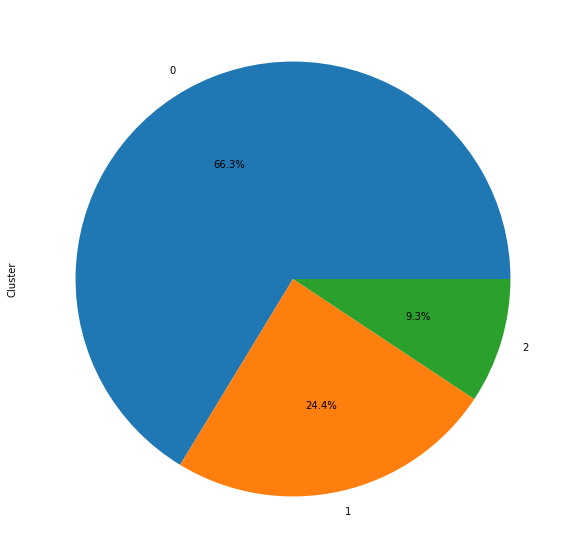

In [3]:
user_profile["Cluster"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

# Cluster analysis - Cluster 0

In [4]:
cluster_0 = user_profile[(user_profile["Cluster"]==0)]

### Subscription Type and Usage

In [5]:
cluster_0["Play_Type"].value_counts()

SINGLE_PLAY    1663
DOUBLE_PLAY     459
TRIPLE_PLAY      71
Name: Play_Type, dtype: int64

<AxesSubplot:ylabel='Play_Type'>

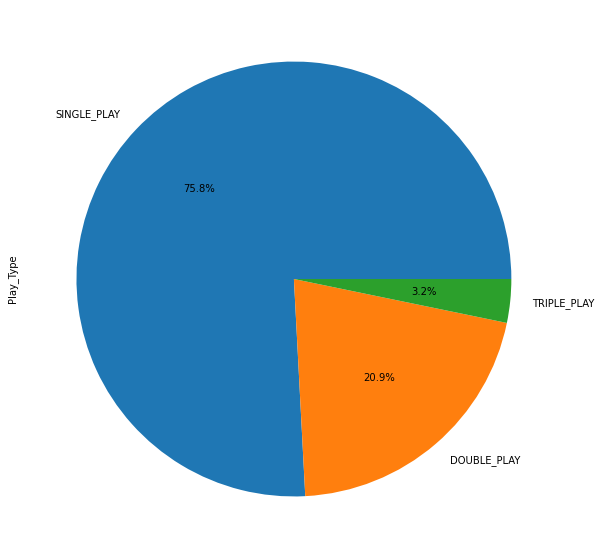

In [72]:
cluster_0["Play_Type"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

#### Double Play categories

{'Double Play(Voice+BB)': 371, 'Double Play(Voice+|PeoTV)': 88}


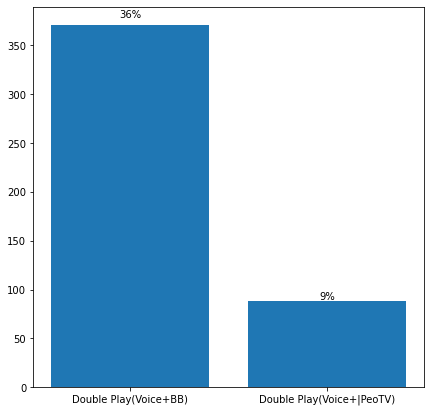

In [48]:
tv_users = cluster_0[(cluster_0["BB_Categorical"] == "NO") & (cluster_0["PEO_TV_Categorical"] != "NO")]["event_source.hash"].count()
bb_users = cluster_0[(cluster_0["BB_Categorical"] != "NO") & (cluster_0["PEO_TV_Categorical"] == "NO")]["event_source.hash"].count()
new_dict= {"Double Play(Voice+BB)": bb_users, "Double Play(Voice+|PeoTV)": tv_users}
print(new_dict)

fig,ax = plt.subplots(figsize=(7,7))
ax.bar(*zip(*new_dict.items()))
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/1025:.0%}', (x + width/2, y + height*1.02), ha='center')
plt.show()

In [6]:
cluster_0["Play_Usage"].value_counts()

['VOICE_LOW', 'BB_NO', 'TV_NO']            1118
['VOICE_MEDIUM', 'BB_NO', 'TV_NO']          480
['VOICE_LOW', 'BB_LOW', 'TV_NO']            241
['VOICE_MEDIUM', 'BB_LOW', 'TV_NO']         116
['VOICE_HIGH', 'BB_NO', 'TV_NO']             65
['VOICE_LOW', 'BB_LOW', 'TV_LOW']            54
['VOICE_LOW', 'BB_NO', 'TV_LOW']             40
['VOICE_LOW', 'BB_NO', 'TV_MEDIUM']          21
['VOICE_MEDIUM', 'BB_NO', 'TV_LOW']          16
['VOICE_HIGH', 'BB_LOW', 'TV_NO']            14
['VOICE_LOW', 'BB_LOW', 'TV_MEDIUM']         10
['VOICE_MEDIUM', 'BB_NO', 'TV_MEDIUM']        8
['VOICE_MEDIUM', 'BB_LOW', 'TV_LOW']          4
['VOICE_HIGH', 'BB_NO', 'TV_LOW']             3
['VOICE_MEDIUM', 'BB_LOW', 'TV_MEDIUM']       2
['VOICE_HIGH', 'BB_LOW', 'TV_LOW']            1
Name: Play_Usage, dtype: int64

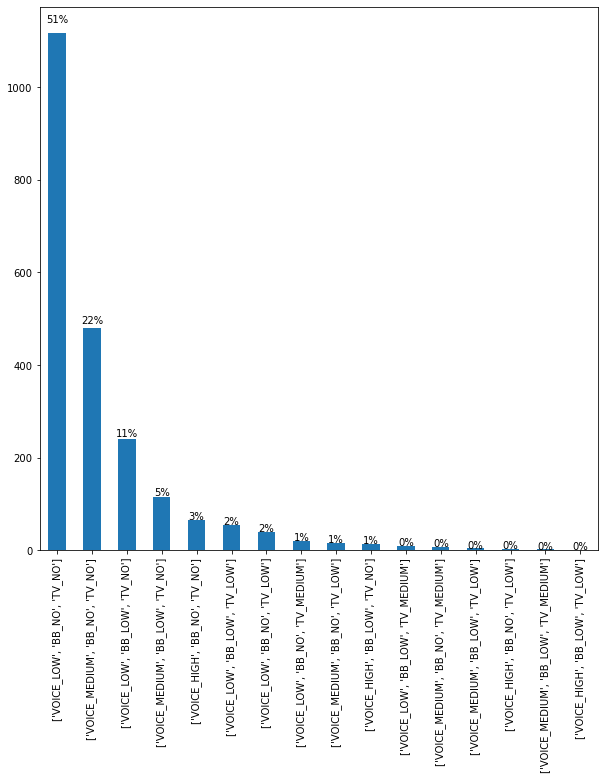

In [7]:
ax =cluster_0["Play_Usage"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Voice Calls Usage

In [8]:
cluster_0["VOICE_Categorical"].value_counts()

LOW       1484
MEDIUM     626
HIGH        83
Name: VOICE_Categorical, dtype: int64

<AxesSubplot:ylabel='VOICE_Categorical'>

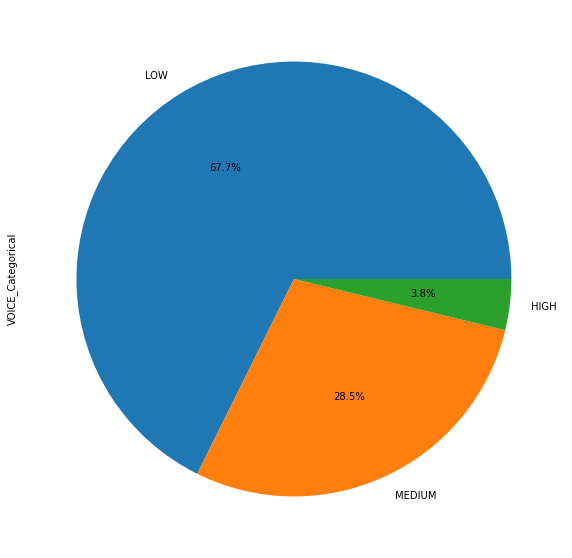

In [9]:
cluster_0["VOICE_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

In [10]:
count_dict = dict(cluster_0["Voice_Packages"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
    else:
        for i in range(y):
            all_products.append(x)
all_voice_products_dict = Counter(all_products)
all_voice_products_dict

Counter({'NO': 2003,
         'V_Installment': 14,
         'V_Call Transfer Three way': 99,
         'V_Absentee service': 86,
         'V_Abbreviated Dialing': 86,
         'V_Call Forwarding': 99,
         'V_Call Waiting': 86,
         'V_Call Forwarding-Immediate': 83,
         'V_Call Forwarding-On Busy': 84,
         'V_Call Forwarding-No Answer': 85,
         'V_IDD': 62,
         'V_Hotline Service': 35,
         'V_Cordeless Phone - Installment': 5,
         'E_PeoTV_Package Transfer': 4,
         'V_DQ Contact Details': 64,
         'V_Basic Phone Installment': 3,
         'V_SLT CLI': 42,
         'V_SLT Voice Service': 26,
         'V_Single VAS Bundle': 34,
         'V_Sisu Connect': 1,
         'V-Plus1_TeleLife': 1,
         'V_Call Barring - Outgoing': 3,
         'V_Outgoing Call Memory': 51,
         'V_Incoming Call Transfer': 42,
         'V_Call Forwarding by time': 48,
         'V_Incoming Call Memory': 51,
         'V_Call Forwarding Offline': 52,
         'V_Ca

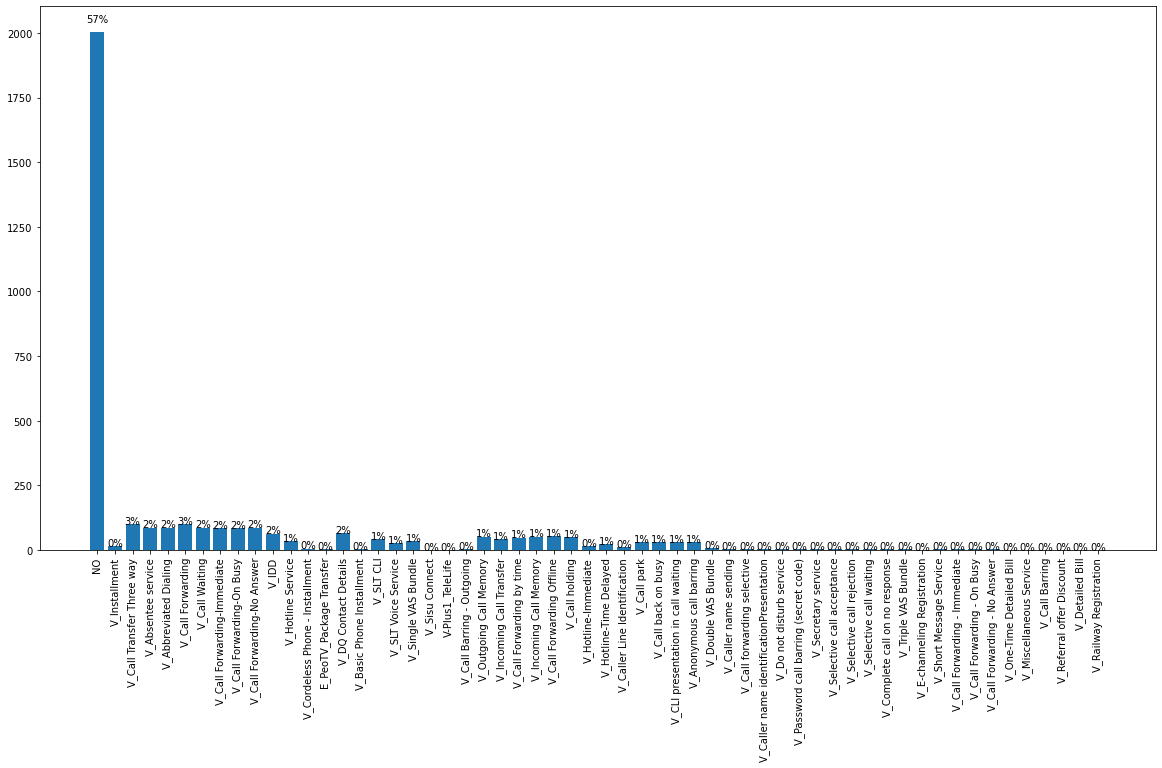

In [11]:
fig,ax = plt.subplots(figsize=(20,10))
ax.bar(*zip(*all_voice_products_dict.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

### IDD Usage

In [12]:
cluster_0["IDD_Overall_Categorical"].value_counts()

NO        1369
LOW        727
MEDIUM      53
HIGH        44
Name: IDD_Overall_Categorical, dtype: int64

<AxesSubplot:ylabel='IDD_Overall_Categorical'>

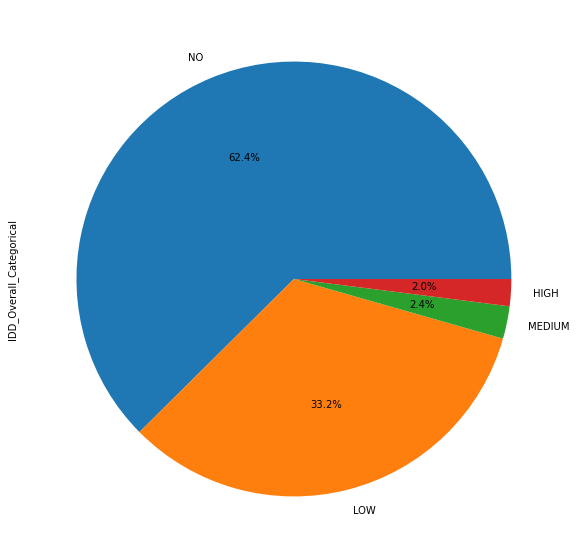

In [13]:
cluster_0["IDD_Overall_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

### PeoTV Usage

In [14]:
cluster_0["PEO_TV_Categorical"].value_counts()

NO        2034
LOW        118
MEDIUM      41
Name: PEO_TV_Categorical, dtype: int64

<AxesSubplot:ylabel='PEO_TV_Categorical'>

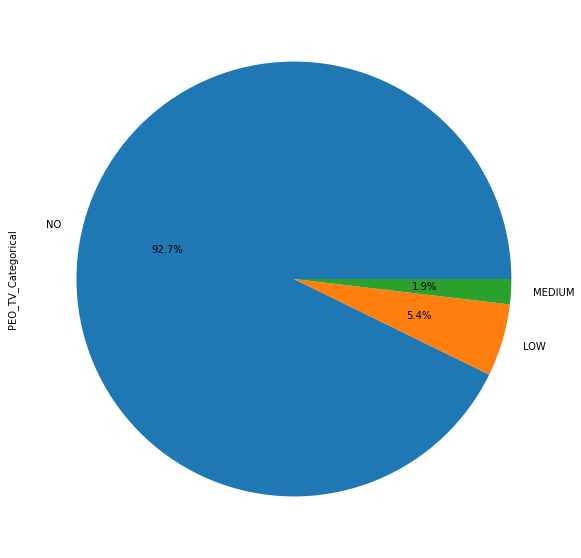

In [15]:
cluster_0["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

<ipython-input-71-a34904de569f>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



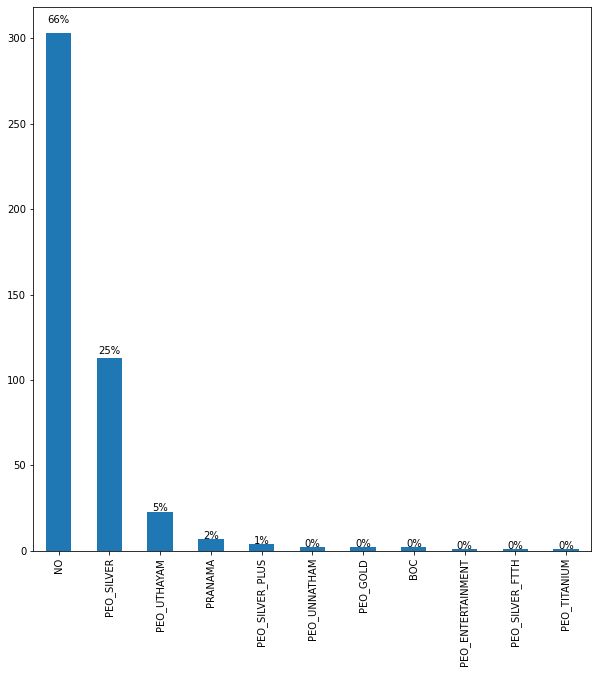

In [71]:
cluster_0_peo = cluster_0[(cluster_0["Play_Type"] == "DOUBLE_PLAY") | (cluster_2["Play_Type"] == "TRIPLE_PLAY")]
ax =cluster_0_peo["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### BroadBand Internet Usage

In [17]:
cluster_0["BB_Categorical"].value_counts()

NO     1751
LOW     442
Name: BB_Categorical, dtype: int64

<AxesSubplot:ylabel='BB_Categorical'>

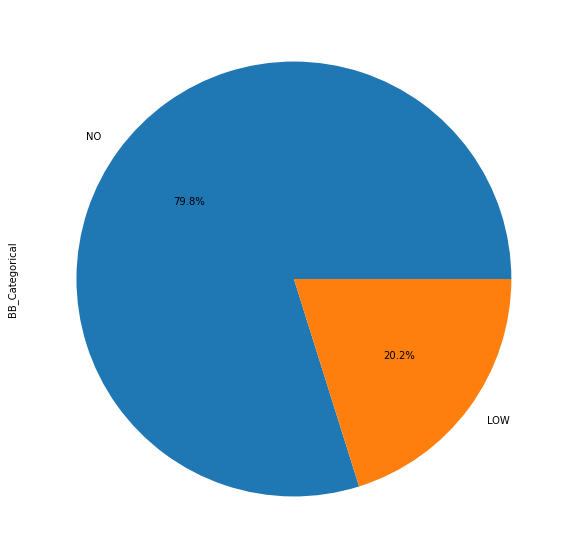

In [18]:
cluster_0["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

### Socio-economic factors

In [19]:
cluster_0["Household_Types"].value_counts()

NO                          2149
['Family_Member_Abroad']      44
Name: Household_Types, dtype: int64

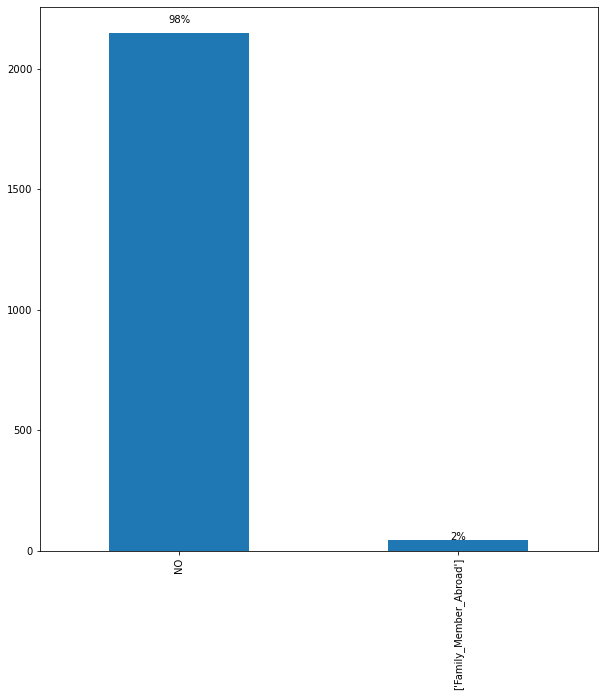

In [20]:
ax = cluster_0["Household_Types"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()
    
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [21]:
cluster_0["Having_Insurance"].value_counts()

NO     2192
YES       1
Name: Having_Insurance, dtype: int64

## Cluster 0 - Findings

- Subscription: Single Play 75%, Double Play 21%, Triple Play 3%
  - Docuble Play subscribers
  - Voice + BB = 36%
  - Voice + PeoTV = 71%
- Subscription Usage: 
  - Voice - Low Usage | 67% L | 28% M | 4% H
  - IDD Calls - Very Low usage | 62% NO | 33% L | 2% M | 2% H
  - PeoTV - No usage | 92% NO | 55% L | 2% M
  - BroadBand - No usage | 79% NO | 20% L
- Mostly used Voice package - **V_Call Transfer Three way** and **V_Call Forwarding** (4%)
- Mostly used PeoTV package (among Double Play or triplr Play users) - Peo_Silver (66%)
- Household : Mostly No information about household , A few houses may have family member abroad (2%)
- One user having insurance coverage. Cannot comment on this as we don't have enough data

# Cluster analysis - Cluster 1

In [73]:
cluster_1 = user_profile[(user_profile["Cluster"]==1)]

### Subscription Type and Usage

In [23]:
cluster_1["Play_Type"].value_counts()

TRIPLE_PLAY    490
DOUBLE_PLAY    316
Name: Play_Type, dtype: int64

<AxesSubplot:ylabel='Play_Type'>

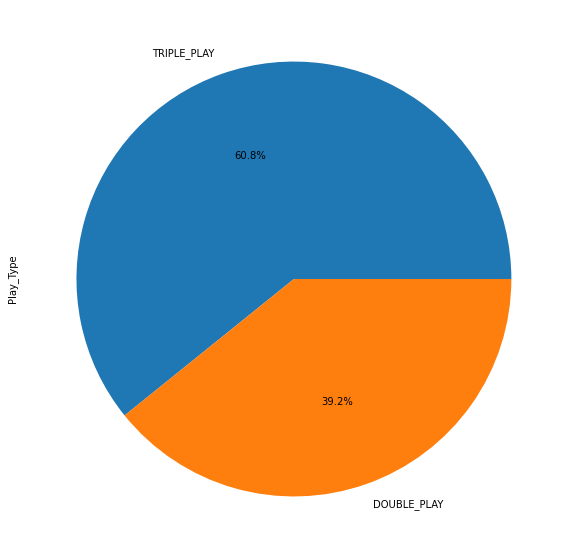

In [74]:
cluster_1["Play_Type"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

### Double play categories

{'Double Play(Voice+BB)': 0, 'Double Play(Voice+|PeoTV)': 316}


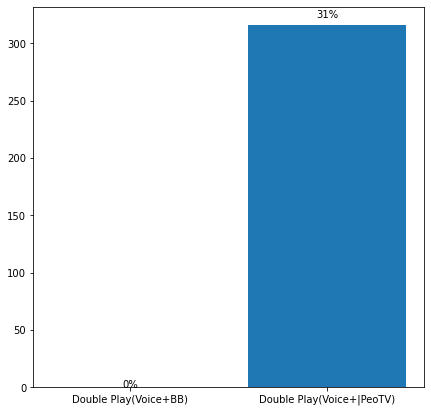

In [47]:
tv_users = cluster_1[(cluster_1["BB_Categorical"] == "NO") & (cluster_1["PEO_TV_Categorical"] != "NO")]["event_source.hash"].count()
bb_users = cluster_1[(cluster_1["BB_Categorical"] != "NO") & (cluster_1["PEO_TV_Categorical"] == "NO")]["event_source.hash"].count()
new_dict= {"Double Play(Voice+BB)": bb_users, "Double Play(Voice+|PeoTV)": tv_users}
print(new_dict)

fig,ax = plt.subplots(figsize=(7,7))
ax.bar(*zip(*new_dict.items()))
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/1025:.0%}', (x + width/2, y + height*1.02), ha='center')
plt.show()

In [24]:
cluster_1["Play_Usage"].value_counts()

['VOICE_LOW', 'BB_NO', 'TV_HIGH']             158
['VOICE_LOW', 'BB_LOW', 'TV_HIGH']             92
['VOICE_MEDIUM', 'BB_NO', 'TV_HIGH']           87
['VOICE_LOW', 'BB_MEDIUM', 'TV_HIGH']          80
['VOICE_MEDIUM', 'BB_MEDIUM', 'TV_HIGH']       69
['VOICE_MEDIUM', 'BB_LOW', 'TV_HIGH']          59
['VOICE_LOW', 'BB_LOW', 'TV_MEDIUM']           49
['VOICE_LOW', 'BB_HIGH', 'TV_HIGH']            37
['VOICE_LOW', 'BB_NO', 'TV_MEDIUM']            34
['VOICE_MEDIUM', 'BB_LOW', 'TV_MEDIUM']        32
['VOICE_MEDIUM', 'BB_NO', 'TV_MEDIUM']         30
['VOICE_MEDIUM', 'BB_HIGH', 'TV_HIGH']         26
['VOICE_MEDIUM', 'BB_MEDIUM', 'TV_MEDIUM']     14
['VOICE_LOW', 'BB_MEDIUM', 'TV_MEDIUM']        14
['VOICE_HIGH', 'BB_LOW', 'TV_HIGH']             5
['VOICE_HIGH', 'BB_NO', 'TV_HIGH']              5
['VOICE_HIGH', 'BB_LOW', 'TV_MEDIUM']           3
['VOICE_HIGH', 'BB_MEDIUM', 'TV_HIGH']          3
['VOICE_HIGH', 'BB_NO', 'TV_MEDIUM']            2
['VOICE_LOW', 'BB_HIGH', 'TV_MEDIUM']           2


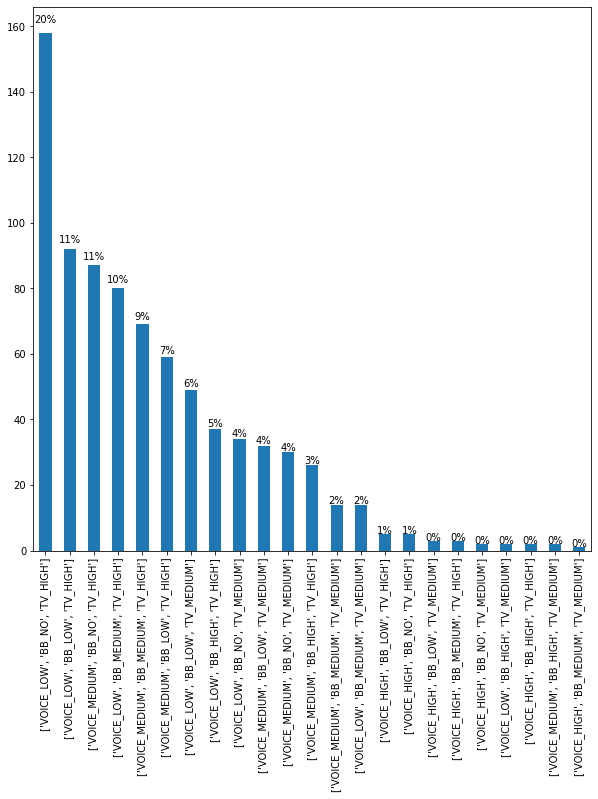

In [25]:
ax =cluster_1["Play_Usage"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Voice Calls Usage

In [26]:
cluster_1["VOICE_Categorical"].value_counts()

LOW       466
MEDIUM    319
HIGH       21
Name: VOICE_Categorical, dtype: int64

<AxesSubplot:ylabel='VOICE_Categorical'>

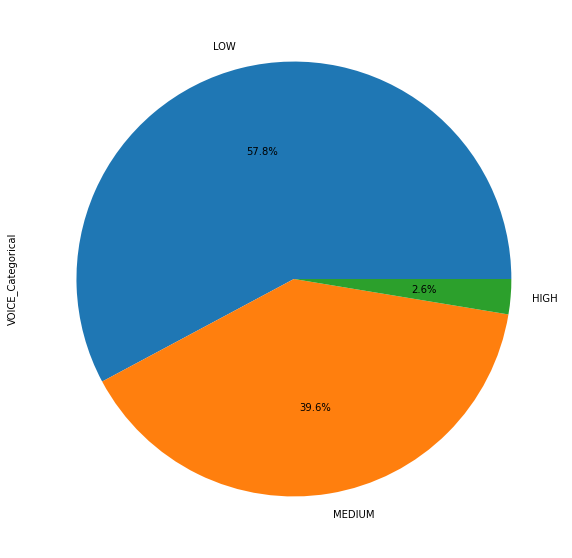

In [27]:
cluster_1["VOICE_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

In [28]:
count_dict = dict(cluster_1["Voice_Packages"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
    else:
        for i in range(y):
            all_products.append(x)
all_voice_products_dict = Counter(all_products)
all_voice_products_dict

Counter({'NO': 725,
         'V_Basic Phone Installment': 7,
         'V_Absentee service': 40,
         'V_Abbreviated Dialing': 38,
         'V_Call Transfer Three way': 45,
         'V_Call Forwarding': 49,
         'V_Call Waiting': 38,
         'V_Call Forwarding-Immediate': 39,
         'V_Call Forwarding-On Busy': 39,
         'V_Call Forwarding-No Answer': 39,
         'V_Hotline Service': 21,
         'V_Cordeless Phone - Installment': 2,
         'V_IDD': 11,
         'V_DQ Contact Details': 9,
         'V_Hotline-Time Delayed': 15,
         'V_Hotline-Immediate': 9,
         'V_Outgoing Call Memory': 18,
         'V_Call holding': 18,
         'V_Anonymous call barring': 13,
         'V_Call Forwarding Offline': 19,
         'V_Incoming Call Memory': 18,
         'V_Call Forwarding by time': 18,
         'V_Call park': 14,
         'V_Call back on busy': 14,
         'V_Incoming Call Transfer': 17,
         'V_CLI presentation in call waiting': 14,
         'V_Caller Line Id

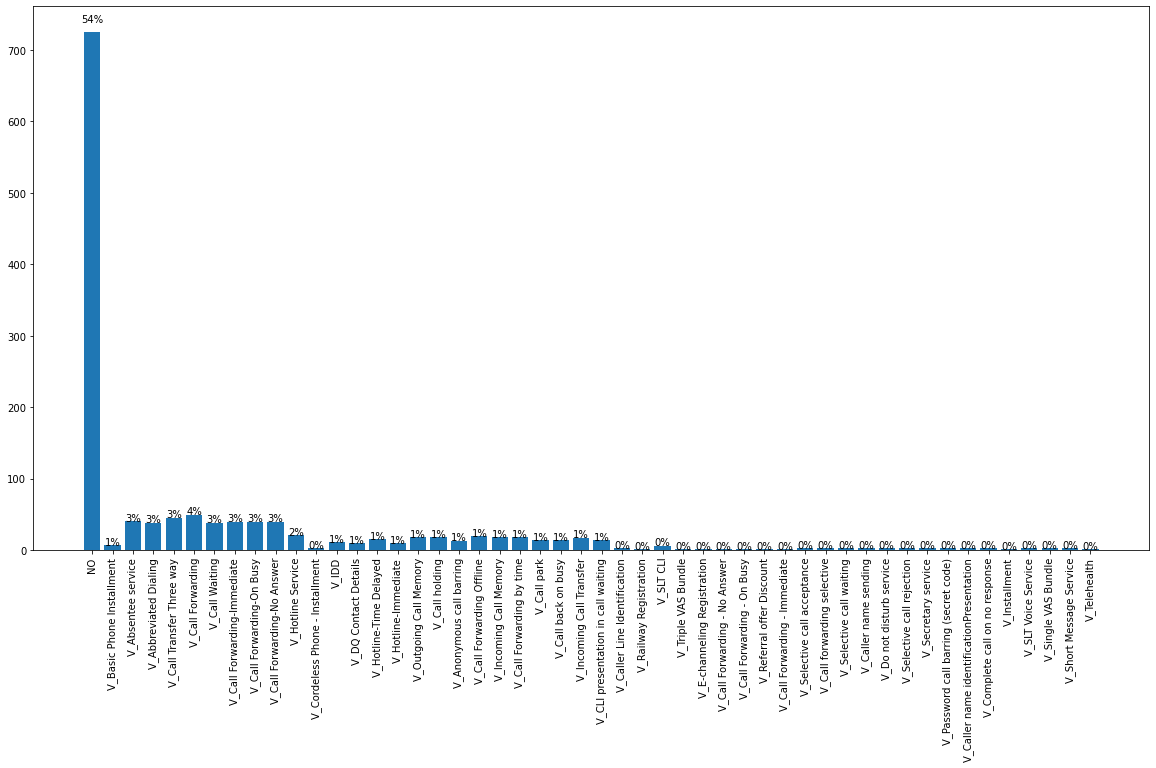

In [29]:
fig,ax = plt.subplots(figsize=(20,10))
ax.bar(*zip(*all_voice_products_dict.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

### IDD Usage

In [30]:
cluster_1["IDD_Overall_Categorical"].value_counts()

NO        487
LOW       284
MEDIUM     20
HIGH       15
Name: IDD_Overall_Categorical, dtype: int64

<AxesSubplot:ylabel='IDD_Overall_Categorical'>

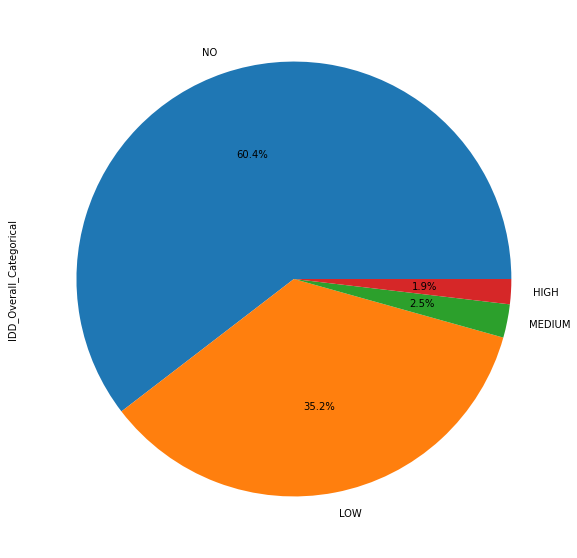

In [31]:
cluster_1["IDD_Overall_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

### PeoTV Usage

In [32]:
cluster_1["PEO_TV_Categorical"].value_counts()

HIGH      623
MEDIUM    183
Name: PEO_TV_Categorical, dtype: int64

<AxesSubplot:ylabel='PEO_TV_Categorical'>

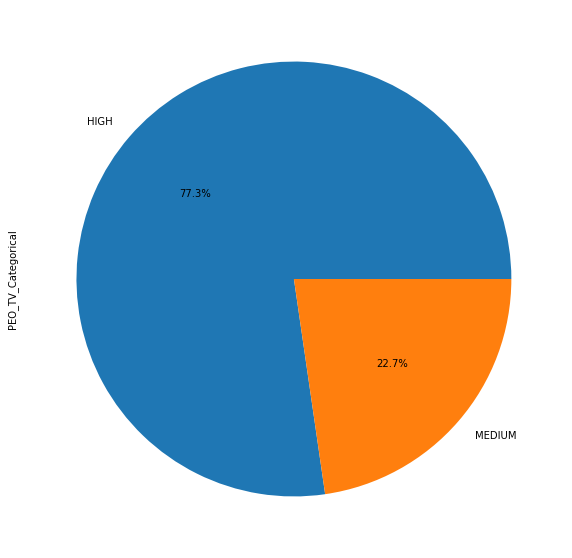

In [33]:
cluster_1["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

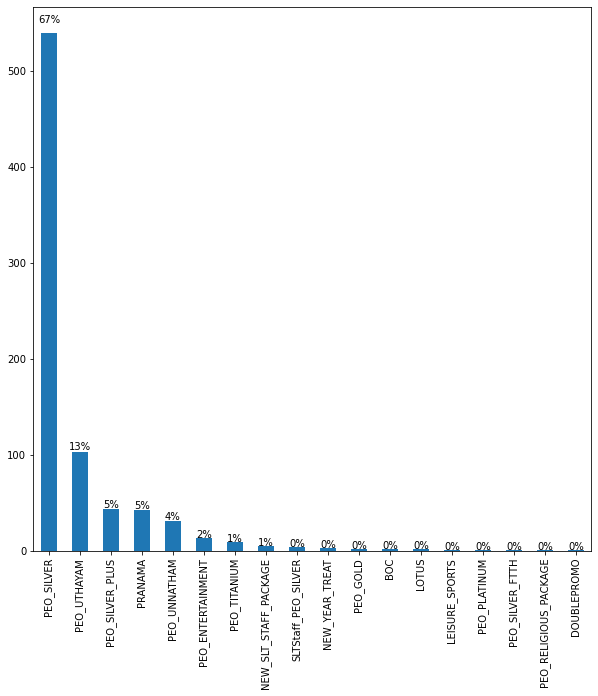

In [35]:
ax =cluster_1["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### BroadBand Internet Usage

In [75]:
cluster_1["BB_Categorical"].value_counts()

NO        316
LOW       240
MEDIUM    181
HIGH       69
Name: BB_Categorical, dtype: int64

<AxesSubplot:ylabel='BB_Categorical'>

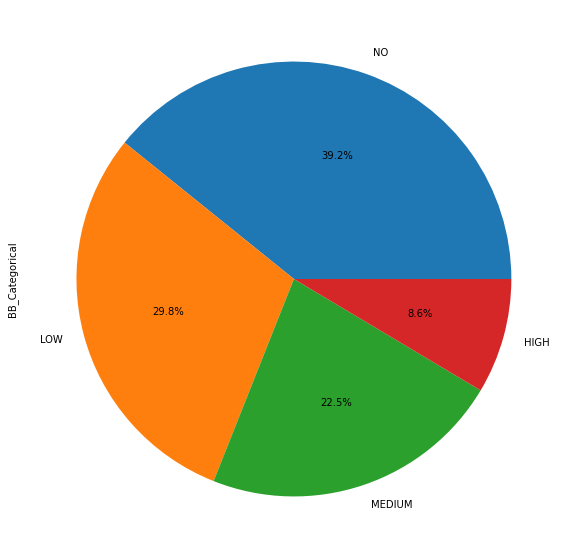

In [76]:
cluster_1["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

### Socio-economic factors

In [38]:
cluster_1["Household_Types"].value_counts()

['Kids']                                                       535
NO                                                             178
['Kids', 'Professional_or_Student']                             60
['Senior_Citizen', 'Kids']                                      12
['Kids', 'Family_Member_Abroad']                                10
['Professional_or_Student']                                      4
['Kids', 'Professional_or_Student', 'Family_Member_Abroad']      3
['Senior_Citizen', 'Kids', 'Professional_or_Student']            2
['Family_Member_Abroad']                                         1
['Senior_Citizen', 'Kids', 'Family_Member_Abroad']               1
Name: Household_Types, dtype: int64

<AxesSubplot:ylabel='Household_Types'>

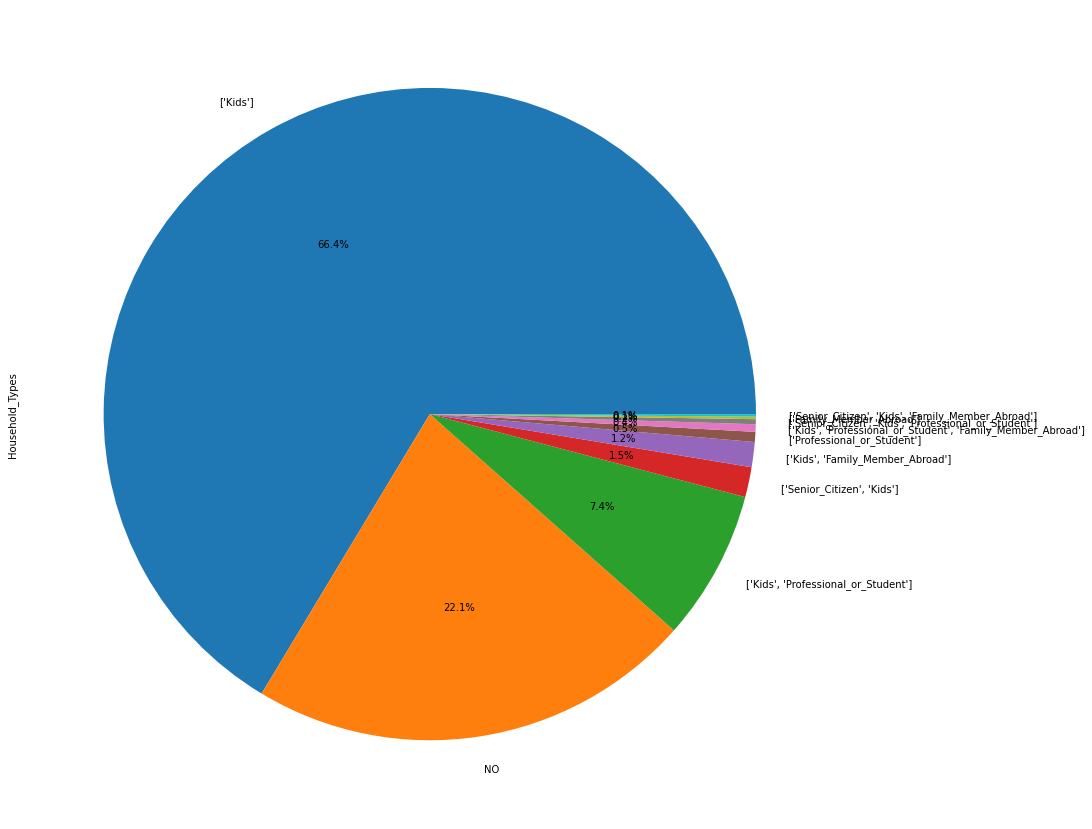

In [40]:
cluster_1["Household_Types"].value_counts().plot(kind='pie', figsize=(15,15), autopct='%1.1f%%')

In [41]:
cluster_1["Having_Insurance"].value_counts()

NO     805
YES      1
Name: Having_Insurance, dtype: int64

## Cluster 1 - Findings

- Subscription: Double Play 39%, Triple Play 60%
  - Double play usage: Voice + PeoTV only (31% of cluster)
- Subscription Usage: 
  - Voice - Low Usage | L 58% | M 39% | H 2.6%
  - IDD - very low usage | N 60% | L 35% | M 25% | H 2%
  - PeoTV ( Double Play + Triple Play) - High usage | 77% H | 23% M
  - Broadband (Triple Play only) - Low usage | 39% NO | 30% L | 8.5% H | 3.2% M
- Mostly Used Voice package - V_Call Forwarding (4%)
- Mostly used PeoTV package (among Double Play, Triple Play users) - Peo Silver (67%)
- Household : Mostly Kids **60%** |  some households have students or working professionals **7.4%**
- Only 1 User having Insurance Coverage. This cannot be commented as we only have 2 users for whole dataset

# Cluster analysis - Cluster 2

In [49]:
cluster_2 = user_profile[(user_profile["Cluster"]==2)]

### Subscription Type and Usage

In [51]:
cluster_2["Play_Type"].value_counts()

DOUBLE_PLAY    250
TRIPLE_PLAY     58
Name: Play_Type, dtype: int64

<AxesSubplot:ylabel='Play_Type'>

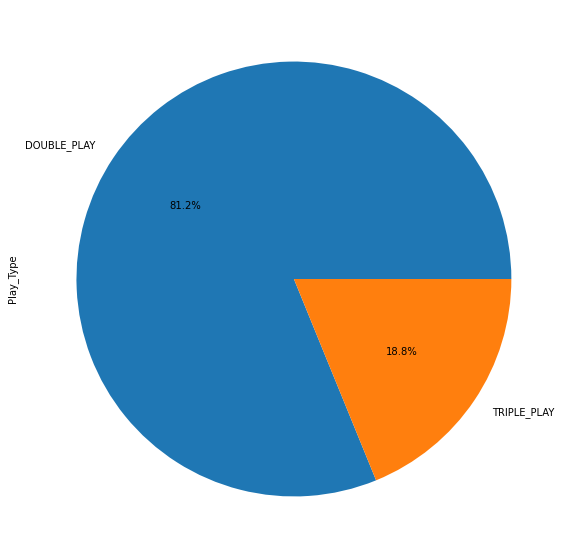

In [78]:
cluster_2["Play_Type"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

### Double Play categories

{'Double Play(Voice+BB)': 250, 'Double Play(Voice+|PeoTV)': 0}


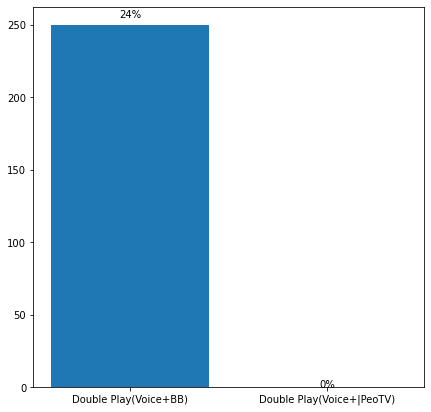

In [52]:
tv_users = cluster_2[(cluster_2["BB_Categorical"] == "NO") & (cluster_2["PEO_TV_Categorical"] != "NO")]["event_source.hash"].count()
bb_users = cluster_2[(cluster_2["BB_Categorical"] != "NO") & (cluster_2["PEO_TV_Categorical"] == "NO")]["event_source.hash"].count()
new_dict= {"Double Play(Voice+BB)": bb_users, "Double Play(Voice+|PeoTV)": tv_users}
print(new_dict)

fig,ax = plt.subplots(figsize=(7,7))
ax.bar(*zip(*new_dict.items()))
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/1025:.0%}', (x + width/2, y + height*1.02), ha='center')
plt.show()

In [53]:
cluster_2["Play_Usage"].value_counts()

['VOICE_LOW', 'BB_MEDIUM', 'TV_NO']           101
['VOICE_LOW', 'BB_HIGH', 'TV_NO']              66
['VOICE_MEDIUM', 'BB_MEDIUM', 'TV_NO']         38
['VOICE_MEDIUM', 'BB_HIGH', 'TV_NO']           25
['VOICE_LOW', 'BB_HIGH', 'TV_MEDIUM']          12
['VOICE_LOW', 'BB_MEDIUM', 'TV_LOW']           10
['VOICE_LOW', 'BB_HIGH', 'TV_LOW']              7
['VOICE_LOW', 'BB_MEDIUM', 'TV_MEDIUM']         7
['VOICE_MEDIUM', 'BB_HIGH', 'TV_MEDIUM']        7
['VOICE_HIGH', 'BB_MEDIUM', 'TV_NO']            7
['VOICE_MEDIUM', 'BB_LOW', 'TV_NO']             6
['VOICE_MEDIUM', 'BB_MEDIUM', 'TV_LOW']         4
['VOICE_HIGH', 'BB_HIGH', 'TV_NO']              4
['VOICE_MEDIUM', 'BB_MEDIUM', 'TV_MEDIUM']      4
['VOICE_HIGH', 'BB_LOW', 'TV_NO']               2
['VOICE_MEDIUM', 'BB_HIGH', 'TV_LOW']           2
['VOICE_LOW', 'BB_HIGH', 'TV_HIGH']             2
['VOICE_HIGH', 'BB_HIGH', 'TV_LOW']             2
['VOICE_LOW', 'BB_LOW', 'TV_NO']                1
['VOICE_MEDIUM', 'BB_LOW', 'TV_LOW']            1


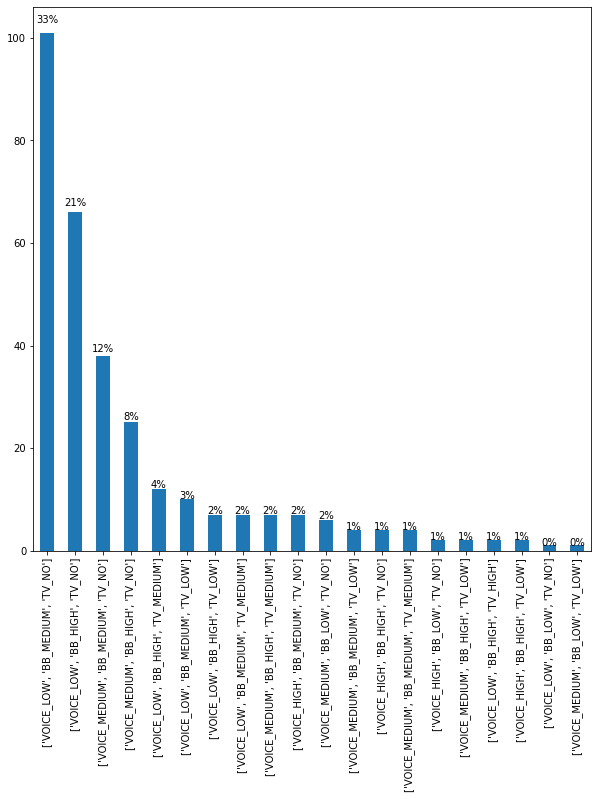

In [54]:
ax =cluster_2["Play_Usage"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Voice Calls Usage

In [55]:
cluster_2["VOICE_Categorical"].value_counts()

LOW       206
MEDIUM     87
HIGH       15
Name: VOICE_Categorical, dtype: int64

<AxesSubplot:ylabel='VOICE_Categorical'>

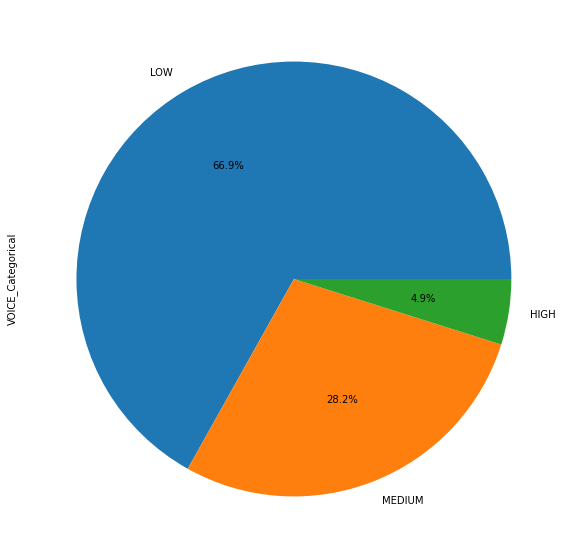

In [56]:
cluster_2["VOICE_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

In [57]:
count_dict = dict(cluster_2["Voice_Packages"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
    else:
        for i in range(y):
            all_products.append(x)
all_voice_products_dict = Counter(all_products)
all_voice_products_dict

Counter({'NO': 279,
         'V_Basic Phone Installment': 4,
         'V_Absentee service': 15,
         'V_Abbreviated Dialing': 15,
         'V_Call Transfer Three way': 15,
         'V_Call Forwarding': 17,
         'V_Call Waiting': 15,
         'V_Call Forwarding-Immediate': 15,
         'V_Call Forwarding-On Busy': 15,
         'V_Call Forwarding-No Answer': 15,
         'V_IDD': 6,
         'V_Hotline Service': 11,
         'V_Hotline-Time Delayed': 8,
         'V_Cordeless Phone - Installment': 3,
         'V_Call back on busy': 3,
         'V_CLI presentation in call waiting': 3,
         'V_Call holding': 6,
         'V_Call Forwarding Offline': 7,
         'V_Anonymous call barring': 3,
         'V_Outgoing Call Memory': 6,
         'V_Call Forwarding by time': 6,
         'V_Incoming Call Transfer': 4,
         'V_Incoming Call Memory': 6,
         'V_Call park': 3,
         'V_Basic Phone': 1,
         'V_Hotline-Immediate': 5,
         'V_Installment': 1,
         'V_Call

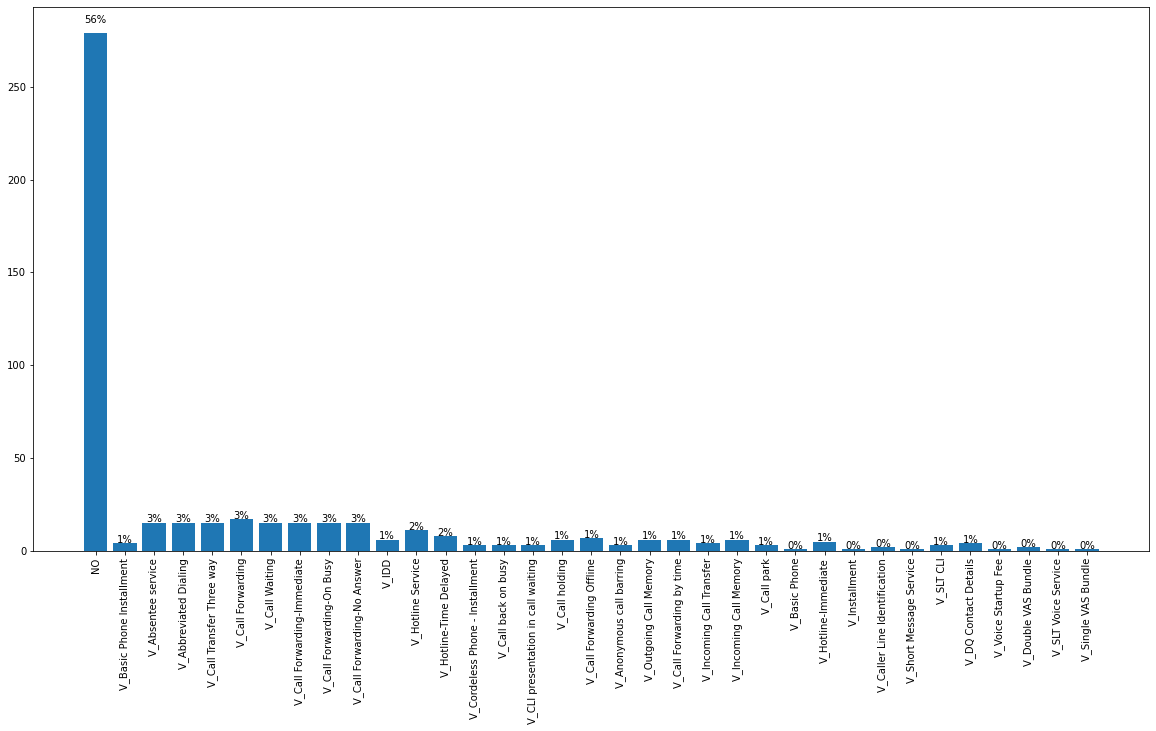

In [58]:
fig,ax = plt.subplots(figsize=(20,10))
ax.bar(*zip(*all_voice_products_dict.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

### IDD Usage

In [59]:
cluster_2["IDD_Overall_Categorical"].value_counts()

NO        156
LOW       137
MEDIUM      9
HIGH        6
Name: IDD_Overall_Categorical, dtype: int64

<AxesSubplot:ylabel='IDD_Overall_Categorical'>

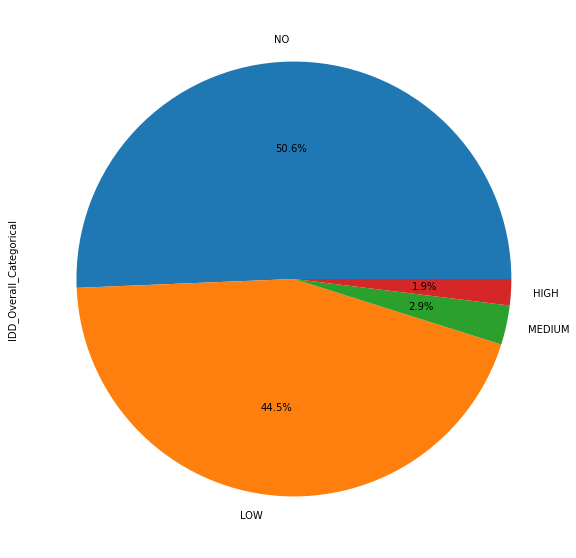

In [60]:
cluster_2["IDD_Overall_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

### PeoTV Usage

In [61]:
cluster_2["PEO_TV_Categorical"].value_counts()

NO        250
MEDIUM     30
LOW        26
HIGH        2
Name: PEO_TV_Categorical, dtype: int64

<AxesSubplot:ylabel='PEO_TV_Categorical'>

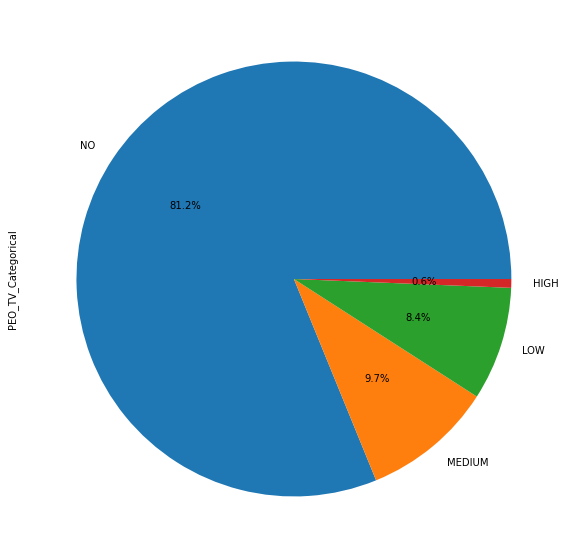

In [62]:
cluster_2["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

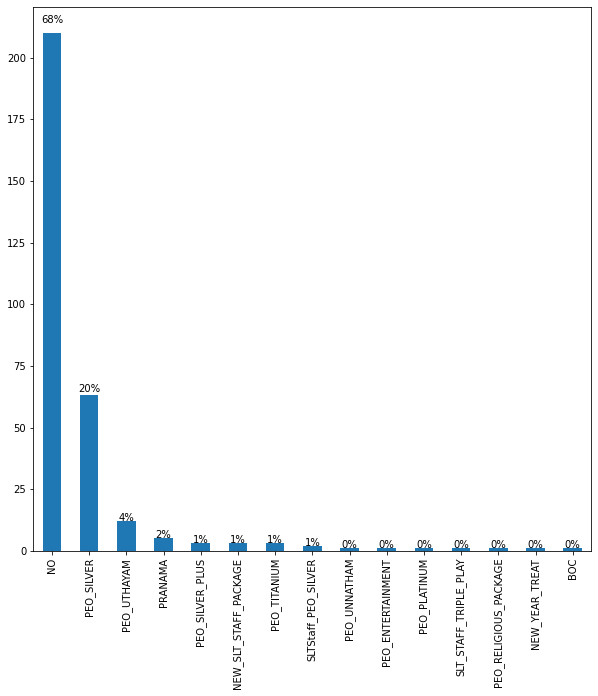

In [65]:
ax =cluster_2["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### BroadBand Internet Usage

In [66]:
cluster_2["BB_Categorical"].value_counts()

MEDIUM    171
HIGH      127
LOW        10
Name: BB_Categorical, dtype: int64

<AxesSubplot:ylabel='BB_Categorical'>

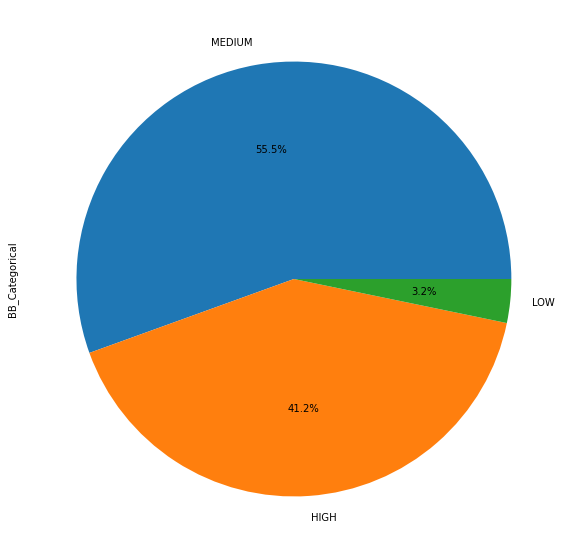

In [67]:
cluster_2["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

### Socio-economic factors

In [68]:
cluster_2["Household_Types"].value_counts()

NO                                                     177
['Professional_or_Student']                            123
['Family_Member_Abroad']                                 4
['Professional_or_Student', 'Family_Member_Abroad']      2
['Kids', 'Professional_or_Student']                      2
Name: Household_Types, dtype: int64

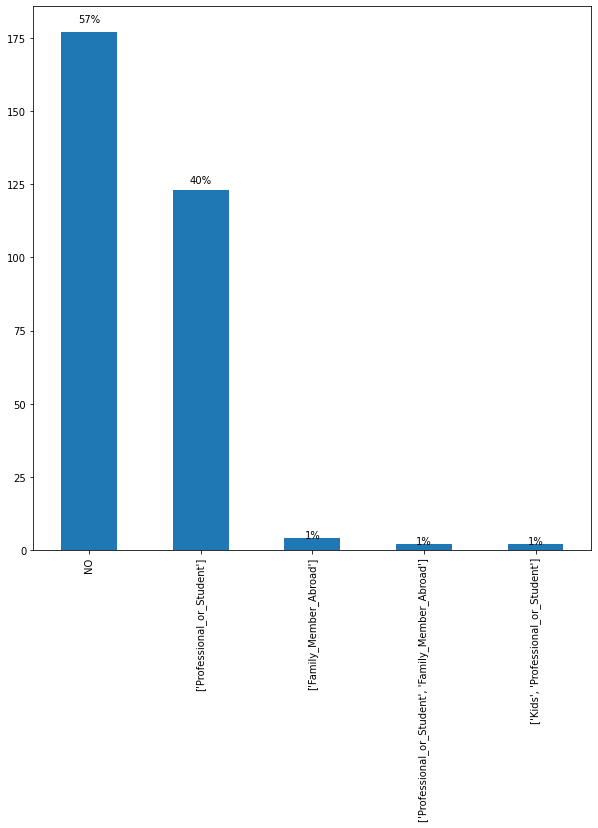

In [69]:
ax = cluster_2["Household_Types"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()
    
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [70]:
cluster_2["Having_Insurance"].value_counts()

NO    308
Name: Having_Insurance, dtype: int64

## Cluster 2 - Findings

- Subscription: Double Play (Voice + BB) 81% , Triple Play 19%
- Subscripotion Usage:
  - Voice - Low | 66% L | 28% M | 5% H
  - IDD - very low or no usage | 50% NO | 44% L | 3% M | 2% H
  - PeoTV (Triply Play only) | 81% NO | 9% M | 8% L
  - BroadBand (Double Play and Triple Play) - | 55% M | 41% H | 3.2% L
- Mostly Used Voice package - V_Call Forwarding (4%)
- Mostly used PeoTV Package (Among Triple Play customers) - Peo_Sliver (68%)
- Household : Halfly No information found **65%** | Mostly have Students or working professionals **41%** | some have family members abroad **2%**
- No users have insurrance coverage